<a href="https://colab.research.google.com/github/Miihi77/Data-Mining-School/blob/main/Phase_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from google.colab import files
upload = files.upload()
upload1 = files.upload()

Mean Squared Error: 4307761.97484058


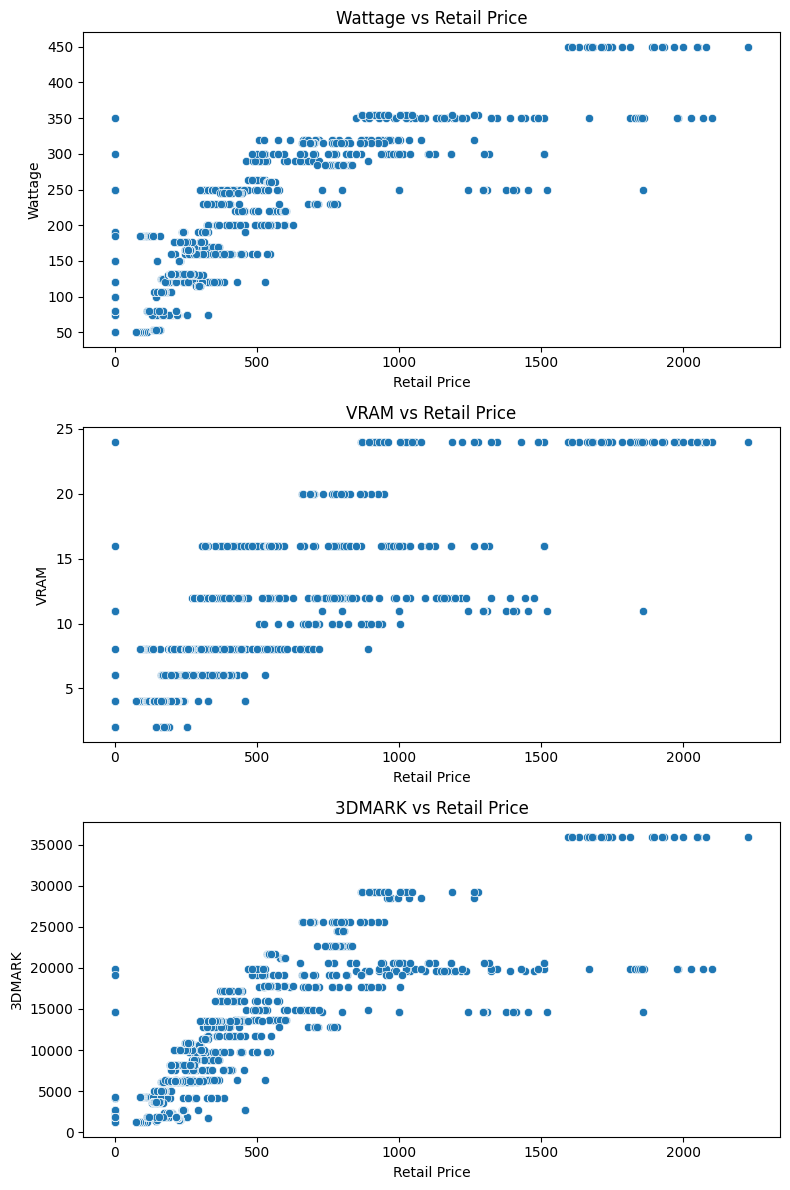

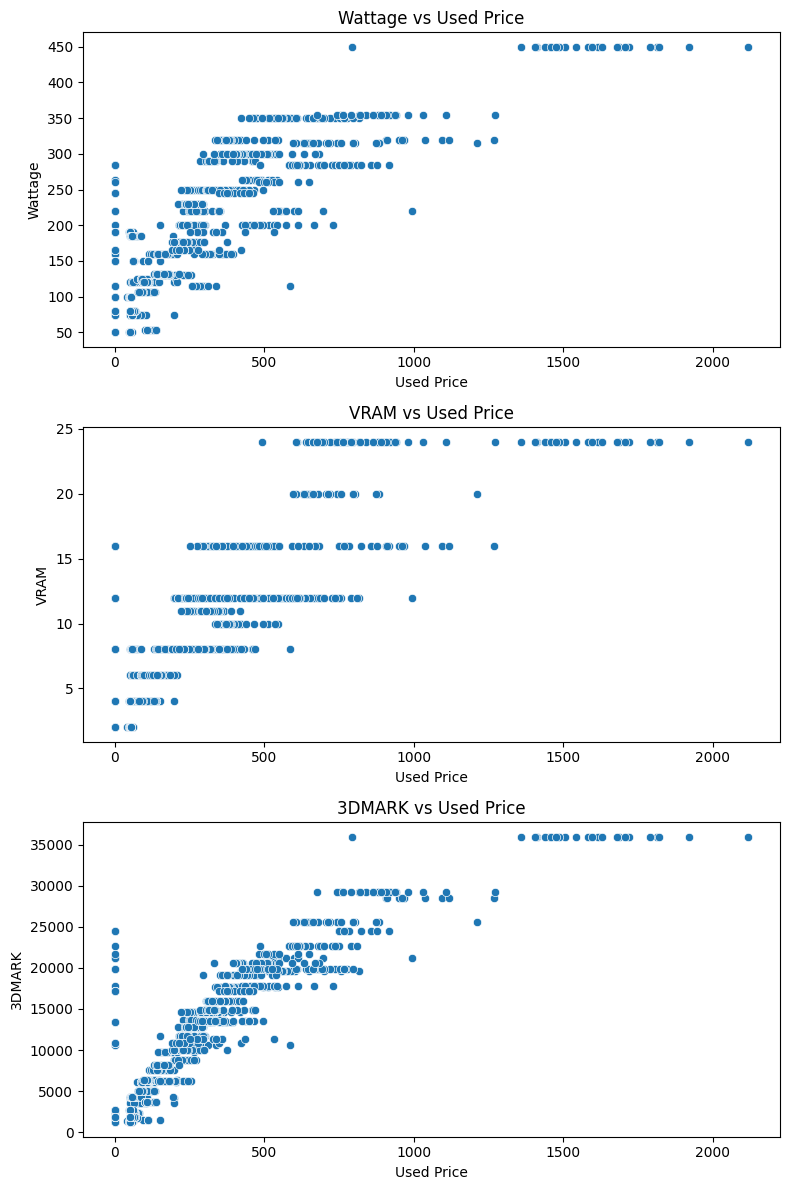

In [ ]:


# Load datasets
metadata_file_path = "gpu_metadata.csv"
price_file_path = "gpu_price_history.csv"
df_metadata = pd.read_csv(metadata_file_path)
df_prices = pd.read_csv(price_file_path)

# Convert Date in price dataset to numerical format
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%m-%d-%y')
df_prices['Date'] = df_prices['Date'].map(datetime.toordinal)

# Merge both datasets on GPU name if applicable (assuming a common column exists)
if 'Name' in df_metadata.columns and 'Name' in df_prices.columns:
    df = pd.merge(df_metadata, df_prices, on='Name', how='inner')
else:
    df = df_metadata  # Fallback to metadata if no common column is found

# Convert Wattage and VRAM to numerical values
df['Wattage'] = df['Wattage'].str.replace('W', '').astype(int)
df['VRAM'] = df['VRAM'].str.replace('GB', '').astype(int)

# Select features and target variable for regression on GPU benchmark (3DMARK)
X = df[['Retail Price', 'Used Price', 'Date']]
y = df[['Wattage', 'VRAM', '3DMARK']]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualization for GPU Specifications vs Retail Price
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
sns.scatterplot(x=df['Retail Price'], y=df['Wattage'], ax=axes[0])
axes[0].set_title("Wattage vs Retail Price")
sns.scatterplot(x=df['Retail Price'], y=df['VRAM'], ax=axes[1])
axes[1].set_title("VRAM vs Retail Price")
sns.scatterplot(x=df['Retail Price'], y=df['3DMARK'], ax=axes[2])
axes[2].set_title("3DMARK vs Retail Price")
plt.tight_layout()
plt.show()

# Visualization for GPU Specifications vs Used Price
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
sns.scatterplot(x=df['Used Price'], y=df['Wattage'], ax=axes[0])
axes[0].set_title("Wattage vs Used Price")
sns.scatterplot(x=df['Used Price'], y=df['VRAM'], ax=axes[1])
axes[1].set_title("VRAM vs Used Price")
sns.scatterplot(x=df['Used Price'], y=df['3DMARK'], ax=axes[2])
axes[2].set_title("3DMARK vs Used Price")
plt.tight_layout()
plt.show()